In [1]:
!pip install surprise
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163487 sha256=8f28872a2b1e17d487b6de2431ff7284add81d68ef4ecfa622aac45bde3051da
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, RandomizedSearchCV, train_test_split
from surprise import SVD
from surprise import accuracy
from surprise import Dataset, Reader

from surprise import accuracy
from surprise import NMF
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the entire data

out_path = str("/content/drive/MyDrive/ADM project/processed_endomondoHR_proper_interpolate.npy")
data = np.load(out_path,allow_pickle=True)[0]

In [4]:
columns = ['userId','gender','sport','id','longitude','latitude','altitude','timestamp','time_elapsed',
           'heart_rate','derived_speed','distance','tar_heart_rate','tar_derived_speed','since_begin','since_last']

In [5]:

df = pd.DataFrame(data=data[0],columns=columns)

In [6]:
# Concatenate all the individual DataFrames into one DataFrame
# final_df = pd.concat(dfs, ignore_index=True)

final_df = pd.concat([pd.DataFrame(data=data_point, columns=columns) for data_point in data], ignore_index=True)

# Pre-processing

# Meghna's EDA

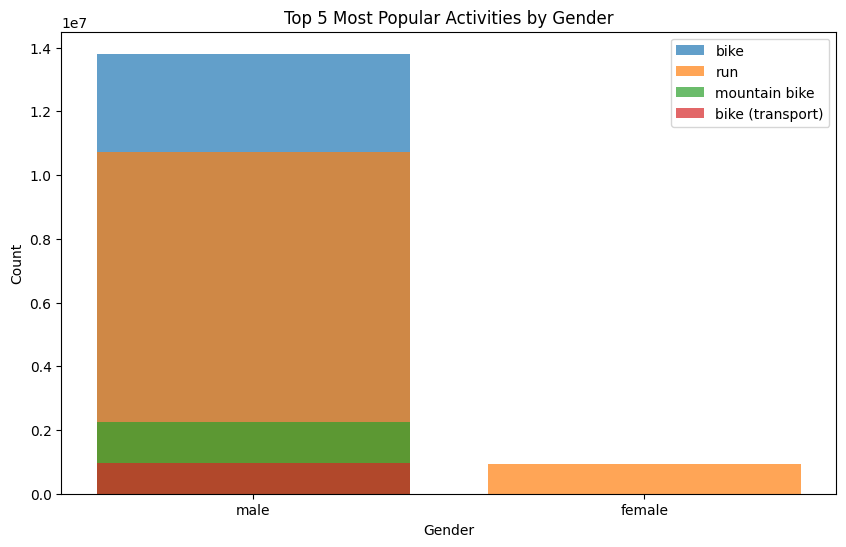

In [7]:
activities_by_gender = final_df.groupby(['sport', 'gender']).size().reset_index(name='count')
activities_by_gender_sorted = activities_by_gender.sort_values(by='count', ascending=False)
top_activities = activities_by_gender_sorted.head(5)

plt.figure(figsize=(10, 6))
for sport in top_activities['sport'].unique():
    data = top_activities[top_activities['sport'] == sport]
    plt.bar(data['gender'], data['count'], label=sport, alpha=0.7)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Top 5 Most Popular Activities by Gender')
plt.legend()
plt.show()


In [8]:
for sport in top_activities['sport'].unique():
    data = top_activities[top_activities['sport'] == sport]

    print(f"Counts for {sport}:")
    for gender in data['gender'].unique():
        count_for_gender = data[data['gender'] == gender]['count'].values[0]
        print(f"   {gender}: {count_for_gender}")


Counts for bike:
   male: 13809300
Counts for run:
   male: 10730100
   female: 936600
Counts for mountain bike:
   male: 2249700
Counts for bike (transport):
   male: 951300


In [9]:
unique_user_count = final_df['userId'].nunique()
print(f'The number of unique user IDs is: {unique_user_count}')

The number of unique user IDs is: 1038


In [10]:
final_df.head(500)

,userId,gender,sport,id,longitude,latitude,altitude,timestamp,time_elapsed,heart_rate,derived_speed,distance,tar_heart_rate,tar_derived_speed,since_begin,since_last
0,10921915,male,bike,396826535,24.649770,60.173349,-1.804467,1408898746,-0.122568,-8.197369,-7.082944,-4.372304,100.000000,7.105427e-15,1.378479e+06,2158.846078
1,10921915,male,bike,396826535,24.650143,60.173240,-1.818636,1408898754,-0.122122,-5.369012,-2.088780,-1.797320,113.355469,1.255489e+01,1.378479e+06,2158.846078
2,10921915,male,bike,396826535,24.650911,60.172980,-1.820717,1408898765,-0.121676,-3.916386,-0.351569,-0.055967,120.214752,1.692208e+01,1.378479e+06,2158.846078
3,10921915,male,bike,396826535,24.650669,60.172478,-1.847772,1408898778,-0.121230,-4.150721,-0.680039,-0.051062,119.108221,1.609634e+01,1.378479e+06,2158.846078
4,10921915,male,bike,396826535,24.649145,60.171861,-1.851729,1408898794,-0.120784,-3.841288,-0.279256,4.282176,120.569362,1.710387e+01,1.378479e+06,2158.846078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10921915,male,bike,392337038,24.490582,60.157103,-1.912529,1408223537,-0.035640,5.009270,2.503686,-2.111284,162.361589,2.409994e+01,-1.480505e+01,-0.011580
496,10921915,male,bike,392337038,24.489612,60.157089,-1.870691,1408223541,-0.035195,6.117394,2.052716,-2.216881,167.594141,2.296624e+01,-1.480505e+01,-0.011580
497,10921915,male,bike,392337038,24.488878,60.157084,-1.805552,1408223544,-0.034749,6.855320,1.318150,-2.800653,171.078617,2.111961e+01,-1.480505e+01,-0.011580
498,10921915,male,bike,392337038,24.488071,60.157209,-1.798576,1408223548,-0.034303,6.096996,1.685688,5.102841,167.497817,2.204357e+01,-1.480505e+01,-0.011580


In [11]:

map_center = [final_df['latitude'].iloc[0], final_df['longitude'].iloc[0]]
my_map = folium.Map(location=map_center, zoom_start=10)

for index, row in final_df.drop_duplicates('userId').iterrows():
    folium.Marker([row['latitude'], row['longitude']],
                  popup=f"User ID: {row['userId']}").add_to(my_map)

display(my_map)

In [20]:

# # Select 4 users for plotting
# selected_users = final_df['user_id'].unique()[:4]

# # Create a Folium map centered at the first user's location
# map_center = [final_df.loc[final_df['user_id'] == selected_users[0], 'latitude'].iloc[0],
#               final_df.loc[final_df['user_id'] == selected_users[0], 'longitude'].iloc[0]]
# mymap = folium.Map(location=map_center, zoom_start=12)

# # Plot the course for each selected user
# for user_id in selected_users:
#     user_data = final_df[final_df['user_id'] == user_id]
#     coordinates = list(zip(user_data['latitude'], user_data['longitude']))

#     # Add PolyLine to the map
#     folium.PolyLine(locations=coordinates, color='blue', weight=2.5, opacity=1).add_to(mymap)

#     # Add markers for each point on the course
#     for lat, lon in coordinates:
#         folium.Marker(location=[lat, lon], popup=f"User {user_id}").add_to(mymap)

# # Save the map as an HTML file
# mymap.save("user_course_map.html")

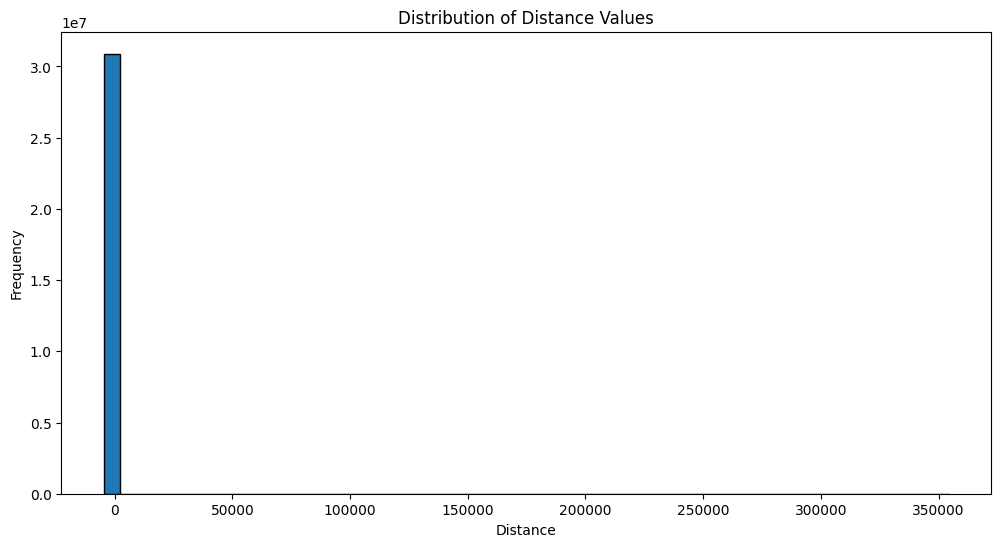

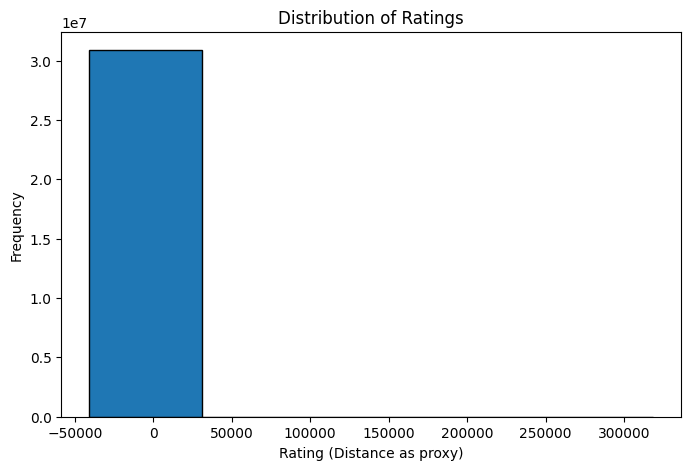

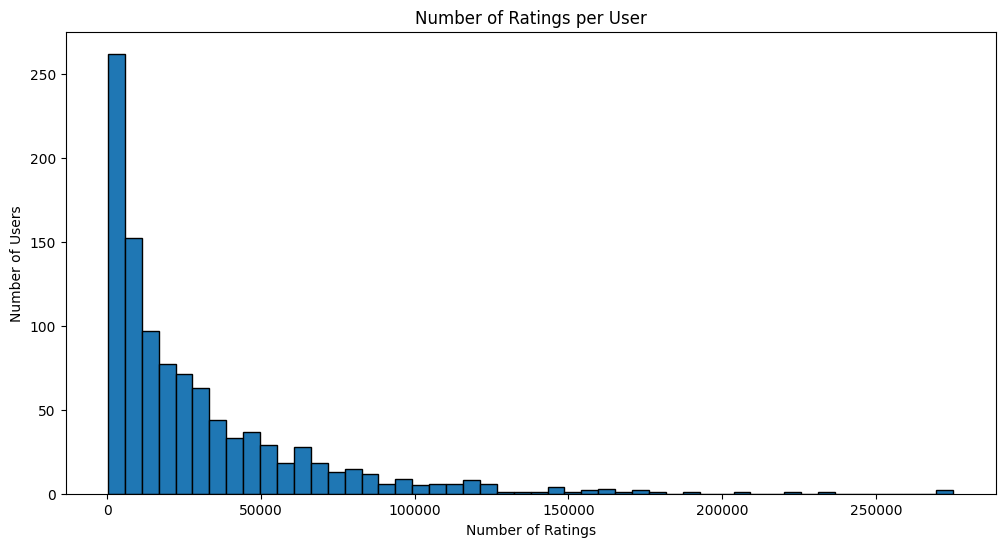

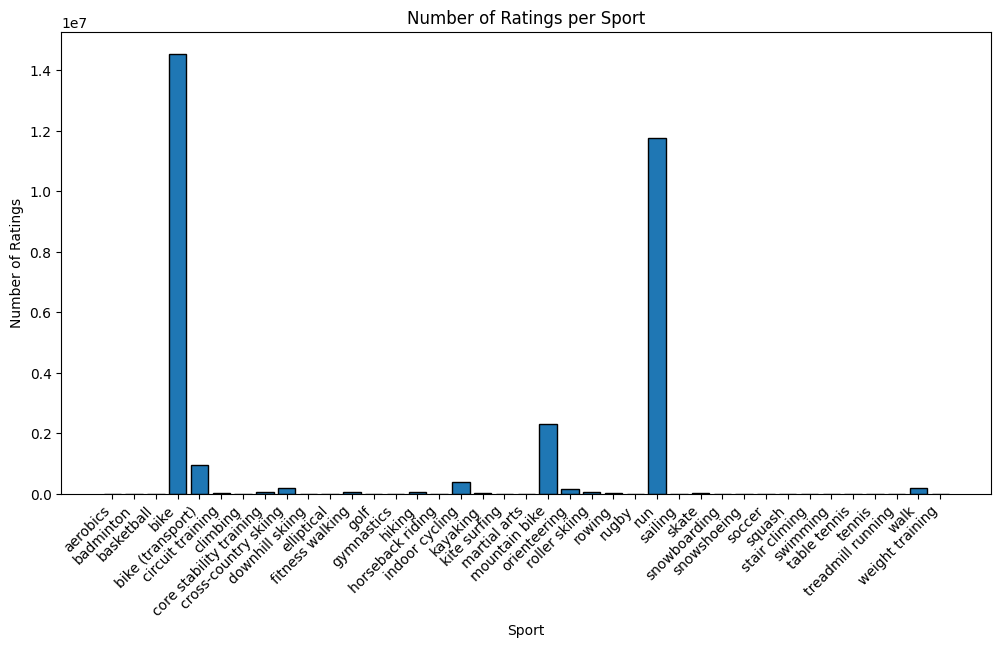

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(final_df['distance'], bins=50, edgecolor='black')
plt.title('Distribution of Distance Values')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(final_df['distance'].astype(int), bins=5, edgecolor='black', align='left')
plt.title('Distribution of Ratings')
plt.xlabel('Rating (Distance as proxy)')
plt.ylabel('Frequency')
plt.show()

ratings_per_user = final_df.groupby('userId')['distance'].count()
plt.figure(figsize=(12, 6))
plt.hist(ratings_per_user, bins=50, edgecolor='black')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

ratings_per_sport = final_df.groupby('sport')['distance'].count()
plt.figure(figsize=(12, 6))
plt.bar(ratings_per_sport.index, ratings_per_sport.values, edgecolor='black')
plt.title('Number of Ratings per Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()


# Model Training - Meghna

Why distance?
In many real-world scenarios, users may not explicitly rate items, but their interactions or behaviors can be considered implicit feedback. In the context of this dataset, the distance covered during an activity might be seen as an implicit measure of user engagement or interest.

In [7]:
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(0, final_df['distance'].max()))

# Clip negative values to a minimum positive value
min_positive_value = 0.1
final_df['distance'] = final_df['distance'].clip(lower=min_positive_value)

data = Dataset.load_from_df(final_df[['userId', 'sport', 'distance']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

Using SVD

In [8]:
model1 = SVD(n_factors=20, random_state=42)

# Train the model on the training set
model1.fit(trainset)
predictions = model1.test(testset)

accuracy.rmse(predictions)
# cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)


RMSE: 354422.0267


354422.02671914344

Using NMF

In [10]:
model2 = NMF(n_factors=50, biased=False, random_state=42)

model2.fit(trainset)
predictions = model2.test(testset)
accuracy.rmse(predictions)


RMSE: 436.2373


436.2373064294964

Code for recommendation

In [9]:
# recommendation code
N = 5

user_id_to_recommend = 10921915
all_sports = final_df['sport'].unique()
items_not_rated_by_user = [item for item in all_sports if trainset.to_inner_iid(item) not in trainset.ur[trainset.to_inner_uid(user_id_to_recommend)]]
user_ratings = [(item, model1.predict(user_id_to_recommend, item).est) for item in items_not_rated_by_user]
user_ratings.sort(key=lambda x: x[1], reverse=True)

top_n_recommendations = user_ratings[:N]  # Replace N with the desired number of recommendations
print("Top {} recommended sports for user {}: {}".format(N, user_id_to_recommend, top_n_recommendations))


Top 5 recommended sports for user 10921915: [('bike', 354427.36614670855), ('run', 354427.36614670855), ('bike (transport)', 354427.36614670855), ('mountain bike', 354427.36614670855), ('rowing', 354427.36614670855)]


In [11]:
# recommendation code
N = 5

user_id_to_recommend = 10921915
all_sports = final_df['sport'].unique()
items_not_rated_by_user = [item for item in all_sports if trainset.to_inner_iid(item) not in trainset.ur[trainset.to_inner_uid(user_id_to_recommend)]]
user_ratings = [(item, model2.predict(user_id_to_recommend, item).est) for item in items_not_rated_by_user]
user_ratings.sort(key=lambda x: x[1], reverse=True)

top_n_recommendations = user_ratings[:N]  # Replace N with the desired number of recommendations
print("Top {} recommended sports for user {}: {}".format(N, user_id_to_recommend, top_n_recommendations))


Top 5 recommended sports for user 10921915: [('downhill skiing', 118.25359007457867), ('walk', 5.8734137904538715), ('bike', 5.078614033194987), ('core stability training', 4.231837774865423), ('kite surfing', 3.7021273831695796)]


In [22]:
# Filter the DataFrame for the specific user
user_data = final_df[final_df['userId'] == 10921915]

# Get unique sports for the user
unique_sports = user_data['sport'].unique()

print(f'Unique sports for userId {10921915}: {unique_sports}')

Unique sports for userId 10921915: ['bike']


Hyperparameter tuning on NMF

In [38]:
# HYPERPARAMETER TUNING

# Create a small subset of your data
subset_size = 100000  # Adjust the size based on your preferences
subset_df = final_df.sample(n=subset_size, random_state=42)

# Adjust the Rating Scale
reader = Reader(rating_scale=(subset_df['distance'].min(), subset_df['distance'].max()))

# Load the subset directly
subset_data = Dataset.load_from_df(subset_df[['userId', 'sport', 'distance']], reader)

# Define the parameter distributions for a randomized search
param_dist = {
    'n_factors': [10, 50, 100, 150, 200, 250],
    'n_epochs': [10, 50, 100, 150],
    'reg_pu': [0.05, 0.1],
    'reg_qi': [0.05, 0.1],
    'lr_bu': [0.002, 0.005],
    'lr_bi': [0.002, 0.005],
    'verbose': [True, False],
    'biased': [False],
}


# Create NMF model
nmf = NMF(biased=True, random_state=42)

random_search = RandomizedSearchCV(NMF, param_distributions=param_dist, n_iter=5, measures=['RMSE'], cv=3, n_jobs=-1, random_state=42)
random_search.fit(subset_data)

best_params = random_search.best_params['rmse']

best_model = NMF(**best_params)
trainset, _ = train_test_split(subset_data, test_size=0.1)  # Using the full subset for training
best_model.fit(trainset)
predictions = best_model.test(trainset.build_testset())

rmse = accuracy.rmse(predictions)
print("Best Parameters:", best_params)
print("RMSE on Subset:", rmse)


RMSE: 68.4792
Best Parameters: {'n_factors': 250, 'n_epochs': 150, 'reg_pu': 0.1, 'reg_qi': 0.1, 'lr_bu': 0.002, 'lr_bi': 0.005, 'verbose': False, 'biased': False}
RMSE on Subset: 68.47922363531612


In [39]:
# NMF with hyperparameter tuning
from surprise import NMF

model3_hyperparameter = NMF(n_factors=250, biased=False, n_epochs=150, reg_pu=0.1, reg_qi=0.1, lr_bu=0.002, lr_bi=0.005, random_state=42, verbose=False)
model3_hyperparameter.fit(trainset)
predictions = model3_hyperparameter.test(testset)
accuracy.rmse(predictions)

RMSE: 437.6654


437.66542602115834

No significant improvement from hyperparameter tuning

Upsampling and Downsampling

=========================

NOT ENOUGH RAM

In [7]:
X = final_df.drop(columns='sport')
y = final_df['sport']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size=0.7, test_size=0.3,stratify=y,random_state=3050)

In [8]:
# concatenate our training data back together

Xy_train = pd.concat([X_train, y_train], axis=1)
Xy_train.head()

,userId,id,longitude,latitude,altitude,timestamp,time_elapsed,heart_rate,derived_speed,distance,tar_heart_rate,tar_derived_speed,since_begin,since_last,gender_female,gender_male,gender_unknown,sport
24505694,3439813,535709885,19.046180,47.525199,-0.877310,1433372018,-0.036086,-6.433488,-17.734068,-3.503602,108.329025,-26.775985,-14.805054,-0.01158,0,1,0,run
28565895,1706844,187467349,-1.497005,53.625954,-1.107787,1368116663,-0.035640,-9.495769,-0.746794,1.585879,93.868971,15.928524,-14.805054,-0.01158,0,1,0,bike
20965894,7516129,150419495,23.633225,56.972904,13.301494,1357867806,-0.080664,-2.061077,-5.415077,-3.276109,128.975495,4.192872,-14.805054,-0.01158,0,1,0,run
26857270,433157,438332626,22.280159,60.460495,-2.233484,1416178127,-0.091363,-2.820184,-1.084621,-1.741765,125.391004,15.079255,-14.805054,-0.01158,0,1,0,bike
7714727,10821441,431741173,-2.579247,53.433129,-2.309849,1372351685,-0.021375,-5.505420,2.913626,17.004866,112.711353,25.130496,-14.805054,-0.01158,0,1,0,bike


In [ ]:
sample_size = 12000
df_all_sample = []

for sport in Xy_train['sport'].unique():
    cond = Xy_train['sport'] == sport
    df_sport = Xy_train[cond]

    # Perform downsampling or upsampling
    if len(df_sport) >= sample_size:
        print('downsampling', sport, len(df_sport))
        df_sample = resample(df_sport, n_samples=sample_size, replace=False, random_state=3050)
    else:
        print('upsampling', sport, len(df_sport))
        df_sample = resample(df_sport, n_samples=sample_size, replace=True, random_state=3050)

    df_all_sample.append(df_sample)

# Combine the sampled arrays into a single array
df_all_sample = pd.concat(df_all_sample, axis=0)

# Extract features and target after sampling
X_train = df_all_sample.drop(columns='sport').values
y_train = df_all_sample['sport'].values

# Display the value counts of the target variable
print(df_all_sample['sport'].value_counts())

In [ ]:
# check after upsample/downsample

unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

In [13]:
# from sklearn.decomposition import NMF
# from sklearn.metrics import mean_squared_error
# # Assuming you want to factorize X_train
nmf_model = NMF(n_components=50, init='random', random_state=3050)
X_train_nmf = nmf_model.fit_transform(X_train)


ValueError: ignored

In [ ]:
X_test_nmf = nmf_model.transform(X_test)


In [ ]:
# Example of evaluating reconstruction error
reconstruction_error = mean_squared_error(X_train, np.dot(X_train_nmf, nmf_model.components_))
print(f"Reconstruction Error: {reconstruction_error}")


=========================